In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
'''
    Edge Detection 
    Canny edge detector
        1. Apply Guassian filter to smooth the image to remove the noise
        2. Find the intensity gradients of the image
        3. Apply non-maximum suppression to get rid of spurious response to edge detection
        4. Apply double threshold to determine potential edges
        5. Track edges by hysteresis
'''

As median value is 64, it is not a super bright image


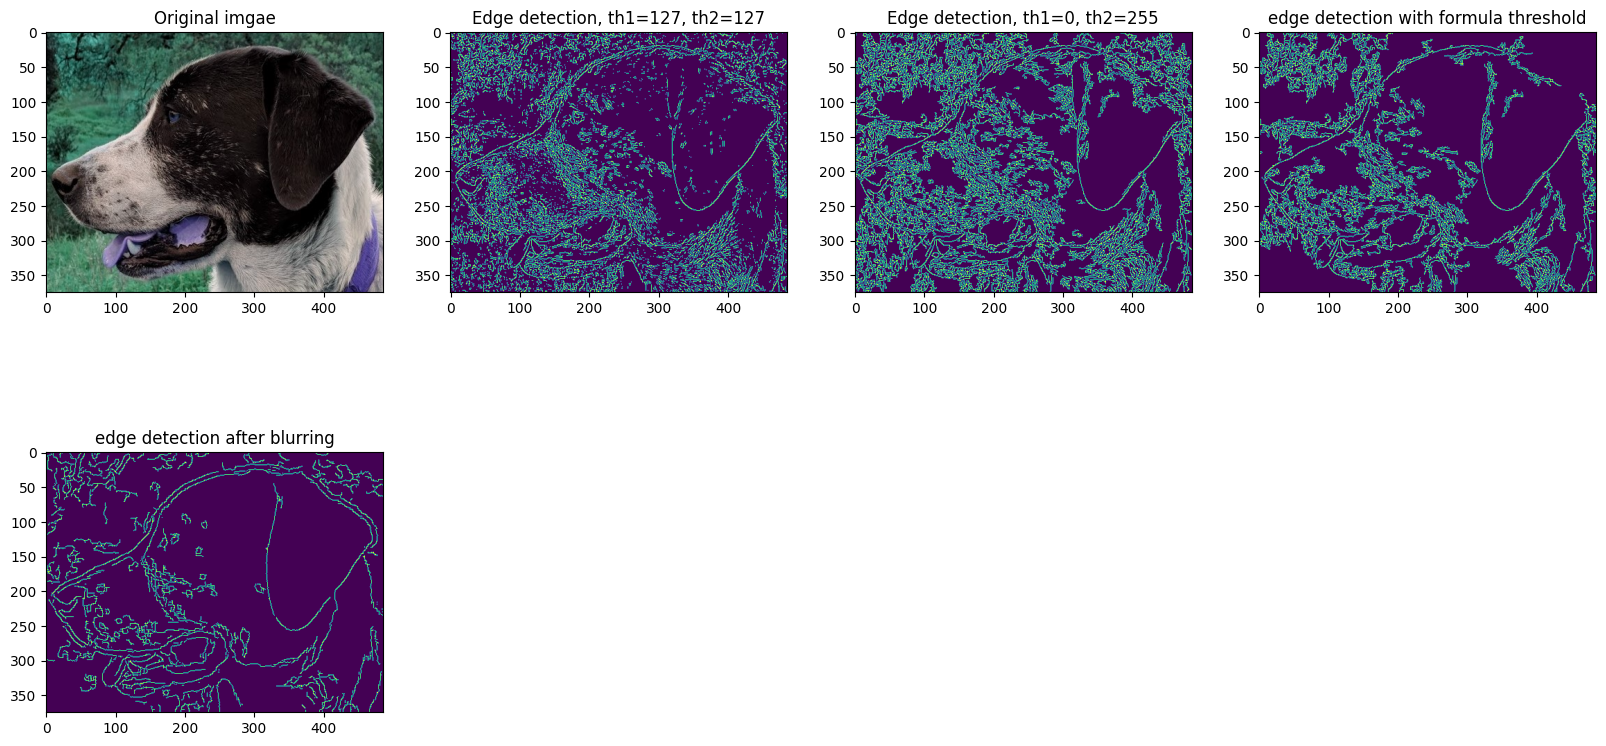

In [16]:
# Prepare the network
fig = plt.figure(figsize=(20,10))
rows = 2
cols = 4
num = 0

def display_img(img,title, cmap=None):
    global num
    num += 1
    ax = fig.add_subplot(rows, cols, num)
    ax.imshow(img, cmap)
    ax.set_title(title)


# Load image
img = cv2.imread('sammy_face.jpg')
display_img(img, 'Original imgae')

ranges = [(127,127),(0,255)]
for range in ranges:
    edges = cv2.Canny(img,threshold1=range[0],threshold2=range[1])
    display_img(edges, f'Edge detection, th1={range[0]}, th2={range[1]}')


# Formula for choosing a particular threshold
median_val = np.median(img)
print('As median value is 64, it is not a super bright image')
lower_bound = int(max(0, 0.07 * median_val))
upper_bound = int(min(255, 1.3 * median_val))
edges = cv2.Canny(img, threshold1=lower_bound, threshold2=upper_bound+300)
display_img(edges, 'edge detection with formula threshold')


# Blurring image can improve edge detection
blurred = cv2.blur(img,ksize=(7,7))
edges = cv2.Canny(blurred, threshold1=lower_bound, threshold2=upper_bound)
display_img(edges, 'edge detection after blurring')

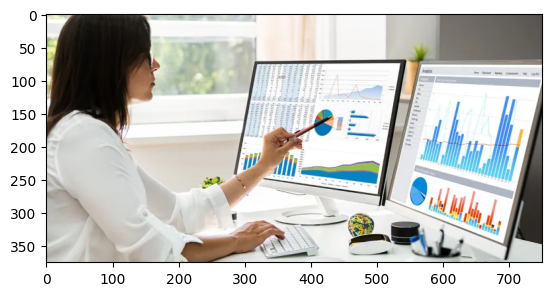

In [21]:
img = cv2.imread('data_analyst.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

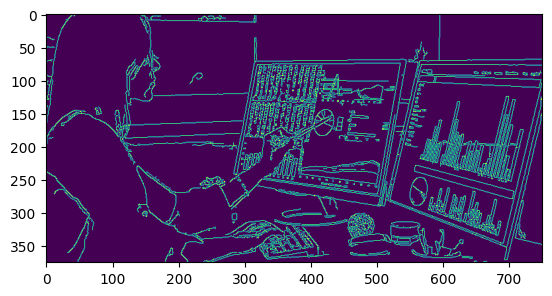

In [28]:
median_val = np.median(img)
lower = int(max(0, 0.07 * median_val))
upper = int(min(255, 1.3 * median_val))
edges = cv2.Canny(img, threshold1=lower,threshold2=upper)
plt.imshow(edges)